In [2]:
import opendatasets as od

od.download(dataset_id_or_url="https://www.kaggle.com/datasets/chandramoulinaidu/spam-classification-for-basic-nlp",
            data_dir=r"C:\Users\erpra\Documents\Python_practice\NaturalLanguageProcessing\data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/chandramoulinaidu/spam-classification-for-basic-nlp


100%|██████████| 5.69M/5.69M [00:02<00:00, 2.81MB/s]

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix


In [5]:
## Reading the dataset

data = pd.read_csv(r"C:\Users\erpra\Documents\Python_practice\NaturalLanguageProcessing\data\spam-classification-for-basic-nlp\Spam Email raw text for NLP.csv")
data.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [9]:
## Checking the target column distribution
print(data['CATEGORY'].value_counts())

print(f"Percentage of spam: {(data['CATEGORY'].value_counts().values[1]/data.shape[0])*100} and Not Spam: {(data['CATEGORY'].value_counts().values[0]/data.shape[0])*100}")

CATEGORY
0    3900
1    1896
Name: count, dtype: int64
Percentage of spam: 32.71221532091098 and Not Spam: 67.28778467908903


In [10]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erpra\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erpra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
## Splitting & Tokenizing

tokenizer = nltk.RegexpTokenizer(r"\w+")
test_message = "Hey,, GGggGG feet it going? <HTML><bads> bads 'randoms' badly"

test_message_tokenized = tokenizer.tokenize(test_message)
test_message_tokenized

['Hey',
 'GGggGG',
 'feet',
 'it',
 'going',
 'HTML',
 'bads',
 'bads',
 'randoms',
 'badly']

In [12]:
## Lowering the text

test_message_lowercased = [t.lower() for t in test_message_tokenized]
test_message_lowercased

['hey',
 'gggggg',
 'feet',
 'it',
 'going',
 'html',
 'bads',
 'bads',
 'randoms',
 'badly']

In [13]:
## Using lemmatizer, to convert the tokens to their root word

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

test_message_lemmatized_tokens = [lemmatizer.lemmatize(t) for t in test_message_lowercased]
test_message_lemmatized_tokens

['hey',
 'gggggg',
 'foot',
 'it',
 'going',
 'html',
 'bad',
 'bad',
 'randoms',
 'badly']

In [14]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

test_message_useful_tokens = [t for t in test_message_lemmatized_tokens if t not in stopwords]
test_message_useful_tokens

['hey', 'gggggg', 'foot', 'going', 'html', 'bad', 'bad', 'randoms', 'badly']

In [18]:
def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]

  return useful_tokens

message_to_token_list(test_message)

['hey', 'gggggg', 'foot', 'going', 'html', 'bad', 'bad', 'randoms', 'badly']

In [16]:
data = data.sample(frac=1, random_state=1)
data = data.reset_index(drop=True)

split_index = int(len(data) * 0.8)
train_df, test_df = data[:split_index], data[split_index:]

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"<HTML>\n\n<BODY>\n\n<META HTTP-EQUIV=3D""Conten...",00275.87c74dc27e397ccd3b2b581bbefef515
1,1,<html>\n\n\n\n\n\n</head>\n\n\n\n<body>\n\n\n\...,00531.f3fffa4504c7009a03dd0d44a4562a84
2,1,<HTML><HEAD><TITLE>New Web Technology</TITLE>\...,01078.58e6f465de71680b96d9d750b7200a59
3,1,\n\n<HTML>\n\n<HEAD>\n\n<TITLE>bizmagoffer</TI...,00627.4e9619c454da17a27d4a66c87583dd49
4,0,URL: http://boingboing.net/#85485824\n\nDate: ...,01894.a6896770e24b5211fa506b0039343769


In [17]:
test_df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,<html>\n\n<center>\n\n<font face=verdana color...,00167.c37f166df54b89ce15059415cfbe12c3
1,1,<HTML><HEAD><TITLE>A Money Making Home Busines...,00377.8568faed5f5f8cd3fb0956786da98a1a
2,1,Greetings -\n\n\n\nI understand you are intere...,00492.3052cad36d423e60195ce706c7bc0e6f
3,0,"On Fri, 2002-08-09 at 19:13, Paul Linehan wrot...",00333.754374109f71535b61b3c5b6db54365a
4,1,"<style type=""text/css"">\n\n<!--\n\na { text-d...",00751.3158a29a29997cc16a69497399d90ca2


In [20]:
token_counter = {} ## Creating a hashmap/dictionary

for message in train_df['MESSAGE']:
  message_as_token_lst = message_to_token_list(message)

  for token in message_as_token_lst:
    if token in token_counter:
      token_counter[token] += 1
    else:
      token_counter[token] = 1

len(token_counter)

76915

In [23]:
token_counter

{'html': 4277,
 'body': 1944,
 'meta': 758,
 'http': 15589,
 'equiv': 448,
 '3d': 34353,
 'content': 2864,
 'type': 2830,
 'text': 2638,
 'charset': 904,
 '3diso': 123,
 '8859': 486,
 '1': 8516,
 'doctype': 115,
 'public': 551,
 'w3c': 123,
 'dtd': 123,
 '4': 3169,
 '0': 9313,
 'transitional': 117,
 'en': 571,
 'head': 1325,
 '3dcontent': 71,
 'mshtml': 85,
 '5': 2989,
 '50': 1643,
 '4134': 19,
 '600': 220,
 'name': 3455,
 '3dgenerator': 67,
 'style': 3307,
 'bgcolor': 2866,
 'ffffff': 2465,
 'div': 3119,
 'nbsp': 10203,
 'font': 34416,
 'size': 13242,
 '3d2': 1043,
 'p': 10622,
 'align': 6914,
 '3dcenter': 715,
 'face': 9616,
 'time': 3142,
 'new': 2651,
 'roman': 498,
 '3d5': 168,
 'em': 433,
 'chickw': 1,
 'eed': 3,
 'healing': 10,
 'salve': 9,
 '3d3': 430,
 'natural': 216,
 'way': 1323,
 'healthy': 37,
 'skin': 54,
 'br': 15303,
 'h': 525,
 'ealing': 1,
 'problem': 961,
 'psoriasis': 1,
 'cancer': 57,
 'rash': 5,
 'sore': 7,
 'throat': 19,
 'di': 30,
 'v': 411,
 'cut': 129,
 'nb': 

In [24]:
def keep_token(proccessed_token, threshold):
  if proccessed_token not in token_counter:
    return False
  else:
    return token_counter[proccessed_token] > threshold

keep_token('random', 100)

False

In [25]:
features = set()

for token in token_counter:
  if keep_token(token, 10000):
    features.add(token)

features

{'3d', 'b', 'br', 'com', 'font', 'http', 'nbsp', 'p', 'size', 'td', 'tr'}

In [26]:
features = list(features)
features

['p', 'b', 'td', '3d', 'size', 'http', 'com', 'font', 'br', 'tr', 'nbsp']

In [27]:
token_to_index_mapping = {t:i for t, i in zip(features, range(len(features)))}
token_to_index_mapping 

{'p': 0,
 'b': 1,
 'td': 2,
 '3d': 3,
 'size': 4,
 'http': 5,
 'com': 6,
 'font': 7,
 'br': 8,
 'tr': 9,
 'nbsp': 10}

In [29]:
## Creating bag of words

def message_to_count_vector(message):
  count_vector = np.zeros(len(features))

  processed_list_of_tokens = message_to_token_list(message)

  for token in processed_list_of_tokens:
    if token not in features:
      continue
    index = token_to_index_mapping[token]
    count_vector[index] += 1
  
  return count_vector


## for testing
message_to_count_vector('3d b <br> .com bad font font com randoms')

array([0., 1., 0., 1., 0., 0., 2., 2., 1., 0., 0.])

In [30]:
message_to_count_vector(train_df['MESSAGE'].iloc[3])

array([ 7., 14., 36.,  0., 12., 13., 15., 30.,  7., 32.,  7.])

In [32]:

## Creating a function to create the required array
def df_to_X_y(dff):
  y = dff['CATEGORY'].to_numpy().astype(int)

  message_col = dff['MESSAGE']
  count_vectors = []

  for message in message_col:
    count_vector = message_to_count_vector(message)
    count_vectors.append(count_vector)

  X = np.array(count_vectors).astype(int)

  return X, y

In [33]:
X_train, y_train = df_to_X_y(train_df)

X_test, y_test = df_to_X_y(test_df)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4636, 11), (4636,), (1160, 11), (1160,))

In [37]:
## Scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

X_train

array([[0.02439024, 0.2254902 , 0.        , ..., 0.03325123, 0.        ,
        0.08818342],
       [0.1097561 , 0.31372549, 0.        , ..., 0.00369458, 0.        ,
        0.01587302],
       [0.04065041, 0.2745098 , 0.13468013, ..., 0.01108374, 0.20472441,
        0.        ],
       ...,
       [0.00406504, 0.        , 0.09427609, ..., 0.00615764, 0.14173228,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [39]:
## Trainning the model

lr = LogisticRegression().fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       790
           1       0.99      0.35      0.52       370

    accuracy                           0.79      1160
   macro avg       0.88      0.68      0.69      1160
weighted avg       0.84      0.79      0.76      1160



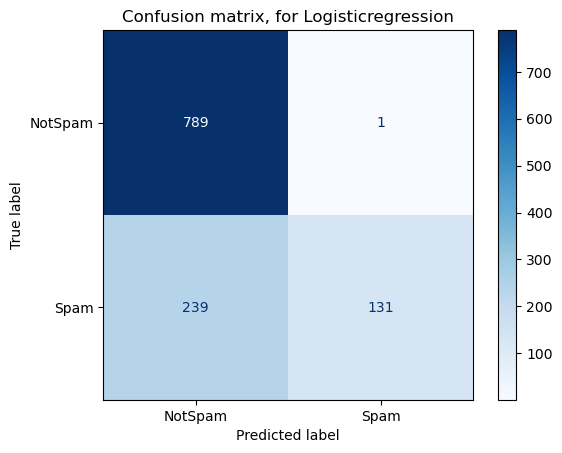

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

class_names = np.array(['NotSpam', 'Spam'])

# Plot non-normalized confusion matrix
title = ("Confusion matrix, for Logisticregression")
disp = ConfusionMatrixDisplay.from_estimator(
    lr,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues
)
disp.ax_.set_title(title)

plt.show()

In [44]:
confusion_matrix(y_test, lr.predict(X_test))

array([[789,   1],
       [239, 131]], dtype=int64)

In [40]:
# Compare logistic regression to random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       790
           1       0.87      0.59      0.70       370

    accuracy                           0.84      1160
   macro avg       0.85      0.77      0.80      1160
weighted avg       0.84      0.84      0.83      1160



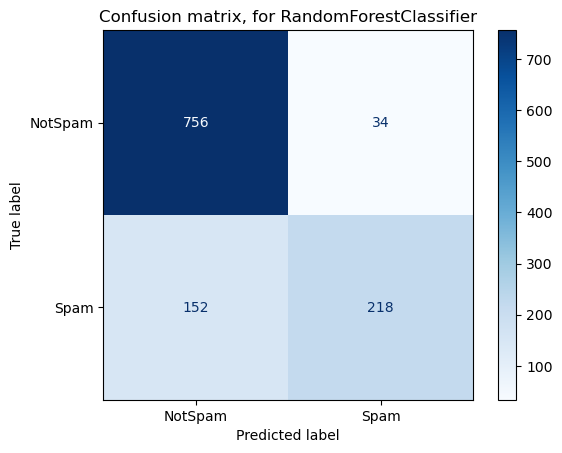

In [52]:
title = ("Confusion matrix, for RandomForestClassifier")
disp = ConfusionMatrixDisplay.from_estimator(
    rf,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues
)
disp.ax_.set_title(title)

plt.show()